LaTex

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Bibliothèque

In [3]:
# numpy
import numpy as np

In [4]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt
from IPython.display import Image

In [5]:
%matplotlib inline

In [6]:
# sympy
import sympy as sy
from sympy import symbols
from sympy import simplify, expand, collect, cancel, apart, trigsimp
from sympy import integrate, diff, series
sy.init_printing(use_unicode = True)

# Exemples

## Triangle

[Text(0, 0.0, '$0$'), Text(0, 1.5, '$h$')]

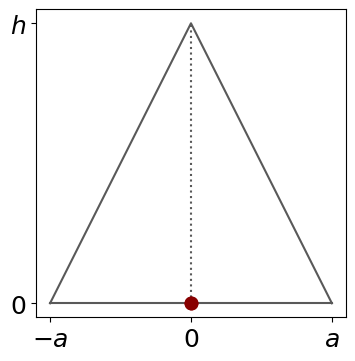

In [7]:
N = 65
x = np.linspace(-1,1,N)
y = -1.5*np.abs(x) + 1.5
fig, ax = plt.subplots(figsize = (4,4))
ax.plot(x, y, color = '0.35')
ax.plot([-1,1], [0,0], color = '0.35')
ax.plot([0,0], [0,1.5], ":", color = '0.35')
ax.plot([0,0], [0,0], ".", color = '#800', ms = 18)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(["$-a$", "$0$", "$a$"], fontsize = 18)
ax.set_yticks([0, 1.5])
ax.set_yticklabels(["$0$", "$h$"], fontsize = 18)

On a un triangle $y=-(b/a) |x| + h$, et on veut calculer son moment d'inertie (en prennant $(0,0)$ comme centre de coordonnées associées au corps).

In [8]:
x, y = sy.symbols("x, y", real=True)
a, h = sy.symbols("a h", real=True)
rho, M = sy.symbols("rho M", real=True)

In [9]:
# intégrale double sur le triangle
def I_triangle(f):
    return sy.integrate(sy.integrate(f, (y, 0,  (h/a)*x + h)), (x, -a, 0)) +\
           sy.integrate(sy.integrate(f, (y, 0, -(h/a)*x + h)), (x, 0, a))

In [10]:
# aire du triangle A, on a M = rho A
A = I_triangle(1)
A

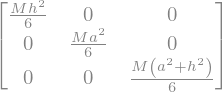

In [11]:
# inertie
# I_xx, I_yy, I_zz = I_xx + I_yy, I_xy = I_yx = 0
I_xx = (M/A) * I_triangle(y**2)
I_yy = (M/A) * I_triangle(x**2)
I_xy = (M/A) * I_triangle(x*y)
I_zz = sy.simplify(I_xx + I_yy)

I = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I

## Cône

Definition paramétrique $\bm x = \bm x(r,\theta,h)$:
\begin{align*}
x(r,\theta,h) &= r\cos(\theta)\\
y(r,\theta,h) &= r\sin(\theta)\\
z(r,\theta,h) &= h
\end{align*}

Centre de masse:
$$\bm R_M = \frac{\rho}{M} \int_0^H \D h \int_0^{hR/H} \D r\int_0^{2\pi} r\D \theta \bm x(r,\theta,h)$$
avec
$$M = \rho \int_0^H \D h \int_0^{hR/H} \D r\int_0^{2\pi} r\D \theta $$

In [13]:
R, H, rho = sy.symbols("R, H, rho", positive = True)
r, t, h = sy.symbols("r, t, h", real = True)
vol = sy.integrate( sy.integrate( sy.integrate( r, (r, 0, h*R/H) ), (t, 0, 2*sy.pi) ), (h, 0, H) )

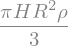

In [14]:
rho * vol

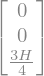

In [15]:
XM = sy.integrate( sy.integrate( sy.integrate( r**2 * sy.cos(t), (r, 0, h*R/H) ), (t, 0, 2*sy.pi) ), (h, 0, H) )
YM = sy.integrate( sy.integrate( sy.integrate( r**2 * sy.sin(t), (r, 0, h*R/H) ), (t, 0, 2*sy.pi) ), (h, 0, H) )
ZM = sy.integrate( sy.integrate( sy.integrate( r*h, (r, 0, h*R/H) ), (t, 0, 2*sy.pi) ), (h, 0, H) )
R_M = sy.simplify( (1/vol) * sy.Matrix( [[XM],[YM],[ZM]] ) )
R_M

## Demi-boule

Équation paramétrique $\bm x = \bm x(r,\theta, \phi)$:
\begin{align*}
x(r,\theta,h) &= r\sin(\theta)\cos(\phi)\\
y(r,\theta,h) &= r\sin(\theta)\sin(\phi)\\
z(r,\theta,h) &= r\cos(\theta)
\end{align*}

Volume:
$$V = 2\pi\int_0^R \D r \int_0^{\pi/2} r^2\D \theta \sin(\theta)$$

Centre de masse:
$$\bm R_M = \frac{1}{V} \int_0^R \D r \int_0^{\pi/2} r^2\D \theta \int_0^{2\pi} \D \phi \sin(\theta) \bm x(r,\theta, \phi)$$

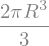

In [16]:
R = sy.symbols("R", positive = True)
r, theta, phi = sy.symbols("r, theta,phi", real = True)
vol = sy.integrate( sy.integrate( sy.integrate( r**2 * sy.sin(theta), (phi, 0, 2*sy.pi) ), (theta, 0, sy.pi/2) ), (r, 0, R) )
vol

In [17]:
ZM = sy.integrate( sy.integrate( sy.integrate( 
    r**3 * sy.sin(theta) * sy.cos(theta), 
    (phi, 0, 2*sy.pi) ), (theta, 0, sy.pi/2) ), (r, 0, R) )

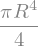

In [18]:
ZM

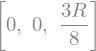

In [19]:
# centre de masse
[0,0,ZM/vol]

Si la sphère est creuse, on se donne une densité de masse de surface (en masse/longueur$^2$). Comme le rayon est fixe, les équations paramétriques deviennent:
\begin{align*}
x(r,\theta,h) &= R\sin(\theta)\cos(\phi)\\
y(r,\theta,h) &= R\sin(\theta)\sin(\phi)\\
z(r,\theta,h) &= R\cos(\theta)
\end{align*}

Surface:
$$S = 2\pi \int_0^{\pi/2} r^2\D \theta \sin(\theta)$$

Centre de masse:
$$\bm R_M = \frac{1}{S} \int_0^{\pi/2} r^2\D \theta \int_0^{2\pi} \D \phi \sin(\theta) \bm x(r,\theta, \phi)$$

In [20]:
aire = sy.integrate( sy.integrate( R**2 * sy.sin(theta), (phi, 0, 2*sy.pi) ), (theta, 0, sy.pi/2) )
aire

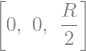

In [21]:
# centre de masse
ZM = sy.integrate( sy.integrate( 
    R**3 * sy.sin(theta) * sy.cos(theta), 
    (phi, 0, 2*sy.pi) ), (theta, 0, sy.pi/2) )
[0,0,ZM/aire]

# Moment d'inertie

La formule:
$$I_{ij} = I^G_{ij} + M(d^2 \delta_{ij} - d_id_j)$$
nous donne le changement de $I^G$ (moment par rapport au centre de masse) quand on déplace l'origine de coordonnées du centre de masse vers un point situé en $\bm d$.

### Example d'une plaque carrée

In [22]:
a, x, y = sy.symbols("a, x, y", real=True)
M = sy.symbols("M", real=True)
def I_carre_0(f):
    return sy.integrate(sy.integrate(f, (y, 0, a)), (x, 0, a))

A = I_carre_0(1)
rho = M/A      
A

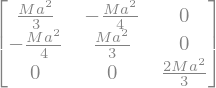

In [23]:
# ORIGINE(0,0)
I_xx = rho * I_carre_0(y**2)                
I_yy = rho * I_carre_0(x**2)           
I_xy = rho * I_carre_0(-x*y)
I_zz = I_xx + I_yy
I_0 = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I_0

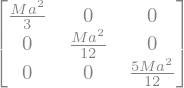

In [24]:
# ORIGINE (a/2,0)
def I_carre_1(f):
    return sy.integrate(sy.integrate(f, (y, 0, a)), (x, -a/2, a/2)) 

I_xx = rho * I_carre_1(y**2)                
I_yy = rho * I_carre_1(x**2)           
I_xy = rho * I_carre_1(-x*y)
I_zz = I_xx + I_yy
I_1 = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I_1

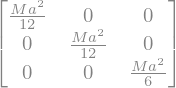

In [25]:
# Centre de masse (a/2,a/2)
def I_carre_G(f):
    return sy.integrate(sy.integrate(f, (y, -a/2, a/2)), (x, -a/2, a/2))

I_xx = rho * I_carre_G(y**2)                
I_yy = rho * I_carre_G(x**2)           
I_xy = rho * I_carre_G(-x*y)
I_zz = I_xx + I_yy
I_G = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I_G

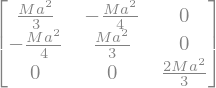

In [26]:
# I_0: on a d = (-a/2,-a/2)
I_d0 = sy.Matrix([[M*a**2/4, -M*a**2/4 , 0], [-M*a**2/4, M*a**2/4, 0], [0, 0,  M*a**2/2]])
I_G + I_d0

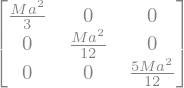

In [27]:
# I_1: on a d = (0,-a/2)
I_d1 = sy.Matrix([[M*a**2/4, 0 , 0], [0, 0, 0], [0, 0,  M*a**2/4]])
I_G + I_d1

### Axes principaux

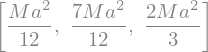

In [28]:
# Carre O=(0,0)
l = sy.symbols("lambda", real=True)
p = sy.det(I_0 - l*sy.eye(3))
sy.solve(sy.Eq(p,0),l)

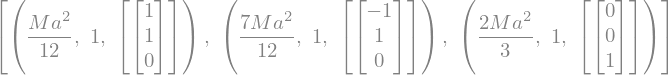

In [29]:
I_0.eigenvects()

on voit qu'une rotation de 45 degrés permet de diagonaliser la matrice (un axe passant par le centre du carrée).